# Welcome to my Notebook
### in this notebook, we want to predict if the patient has the disease (Diabete) or not


### Improting the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import sklearn
import scipy
from collections import Counter

sns.set()

### Importing the dataset into the kernel

In [2]:
#loading the dataset into the kernel and gaining an overview from the dataset
data = pd.read_csv("../input/docspot/datasets_228_482_diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#let's understand the shape of our dataset by executing the code below
print("There are {} Rows and {} Columns in the dataset".format(data.shape[0],data.shape[1]))

There are 768 Rows and 9 Columns in the dataset


In [4]:
#Let's gain some information about the data types of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* From the above table we can underestand that:
* We have numeric values which contain of "int64" & "float64"

In [5]:
#By executing the code below, we could gain some statistical infomration about our dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* Interesting!!! Since there are many zeros in data and values of 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' cannot be zero, Therefore, Converriting Zeros into NaN value

# Exploratory Data Analysis EDA

### From the zero values, we can understand that they are Missing Values in our dataset
### Hnece, We would convert the Zero values into the NAN values and then solving the missing values

In [6]:
data_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [7]:
data[data_zeros] = np.where((data[data_zeros]==0), np.nan, data[data_zeros])

# Missing Values


In [8]:
#missing data
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data.head(25)

,Total,Percent
Insulin,374,0.486979
SkinThickness,227,0.295573
BloodPressure,35,0.045573
BMI,11,0.014323
Glucose,5,0.006510
Pregnancies,0,0.000000
DiabetesPedigreeFunction,0,0.000000
Age,0,0.000000
Outcome,0,0.000000


# Handling Missing Values

* Filling NaN values with suitable mean and median values

Filling the Missing Values of Glucose Column

In [9]:
data["Glucose"] = data["Glucose"].fillna(data["Glucose"].mean())
data.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Filling the Missing Values of BloodPressure Column

In [10]:
data["BloodPressure"] = data["BloodPressure"].fillna(data["BloodPressure"].mean())
data.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Filling the Missing Values of SkinThickness Column

<AxesSubplot:xlabel='SkinThickness'>

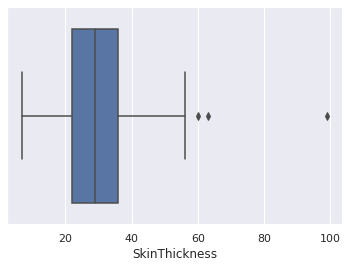

In [11]:
sns.boxplot(x = "SkinThickness", data = data )

* We have outlier here. Hence, it would impact on the mean of the column. It is highly better to fit the missing values with the median instead of mean of the feature

In [12]:
data["SkinThickness"].mean(), data["SkinThickness"].median()

(29.153419593345657, 29.0)

In [13]:
data["SkinThickness"] = data["SkinThickness"].fillna(data["SkinThickness"].median())
data.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Filling the missing values of the 'Insulin' column

<AxesSubplot:xlabel='Insulin'>

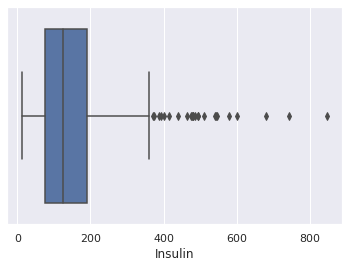

In [14]:
sns.boxplot(x = "Insulin", data = data)

* We have outlier here. Hence, it would impact on the mean of the column. It is highly better to fit the missing values with the median instead of mean of the feature

In [15]:
data['Insulin'].mean(), data['Insulin'].median()

(155.5482233502538, 125.0)

In [16]:
data["Insulin"] = data['Insulin'].fillna(data['Insulin'].median())
data.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

### Filling the missing values of the "BMI" column

<AxesSubplot:xlabel='BMI'>

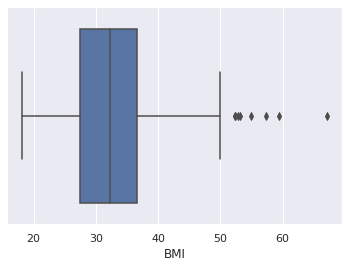

In [17]:
sns.boxplot(x = "BMI", data = data)

* We have outlier here. Hence, it would impact on the mean of the column. It is highly better to fit the missing values with the median instead of mean of the feature

In [18]:
data['BMI'].mean(), data['BMI'].median()

(32.45746367239099, 32.3)

In [19]:
data['BMI'] = data['BMI'].fillna(data['BMI'].median())
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Great! we do not have any missing values here
### Let's remove the outlier from our dataset by executing the code below

# Outlier Detection

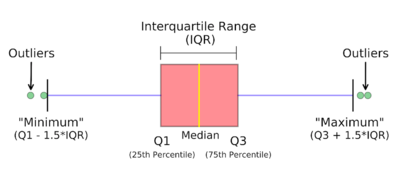
* Q1 = 1.Quartile 25%
* Q2 = 2.Quartile 50% (median)
* Q3 = 3.Quartile 75%
* IQR = Q3 - Q1
* Outlier data = (Q1 - 1.5 IQR ) U (Q3 + 1.5 IQR)

In [20]:
def outlier_detect(feature, data):
    outlier_index = []

    for each in feature:
        Q1 = np.percentile(data[each], 25)
        Q3 = np.percentile(data[each], 75)
        IQR = Q3 - Q1
        min_quartile = Q1 - 1.5*IQR
        max_quartile = Q3 + 1.5*IQR
        outlier_list = data[(data[each] < min_quartile) | (data[each] > max_quartile)].index
        outlier_index.extend(outlier_list)
        
    outlier_index = Counter(outlier_index)
    #If there are three or more outlier data features we must delete them. (n)
    outlier_data = list(i for i, n in outlier_index.items() if n > 3)
    return outlier_data

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [22]:
outlier_data = outlier_detect(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction','Insulin', 'Age'], data)
data.loc[outlier_data]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
445,0,180.0,78.0,63.0,14.0,59.4,2.42,25,1


In [23]:
data = data.drop(outlier_data, axis=0).reset_index(drop=True)

# Data Visualization

In [24]:
data_num = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction','Insulin', 'Age']]

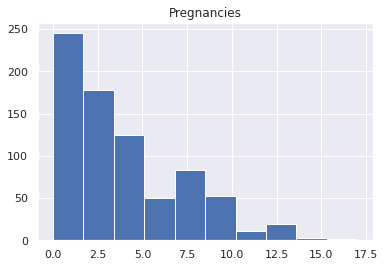

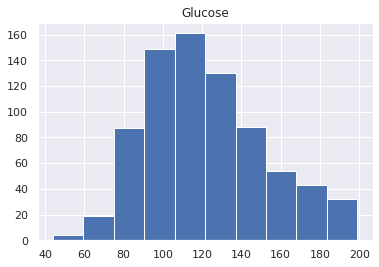

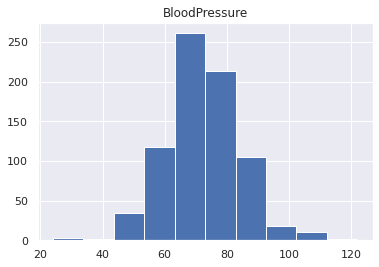

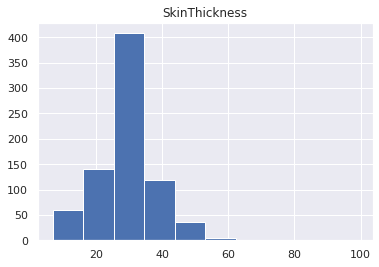

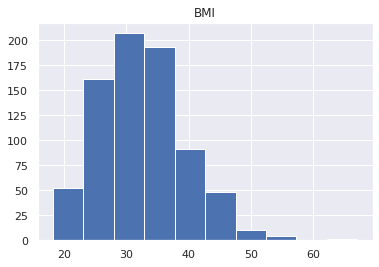

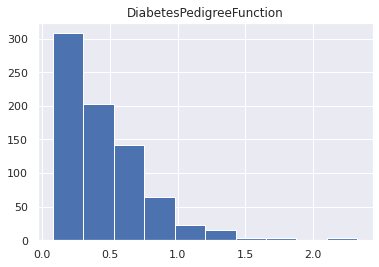

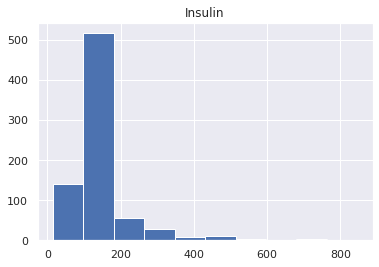

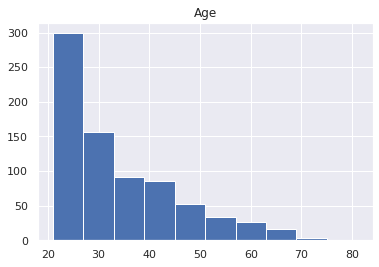

In [25]:
for i in data_num.columns:
    plt.hist(data_num[i])
    plt.title(i)
    plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


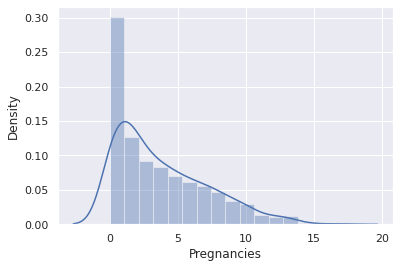

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


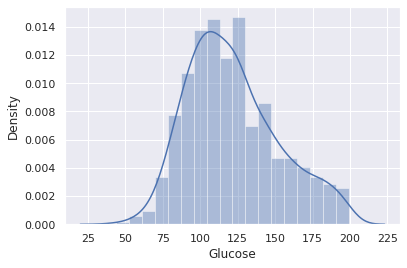

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


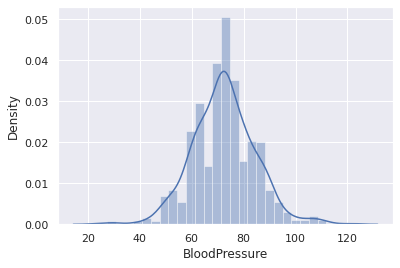

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


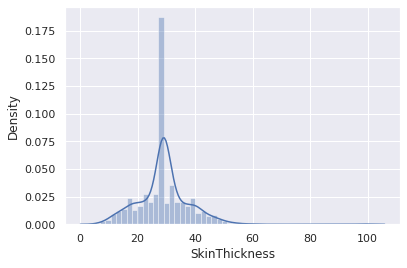

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


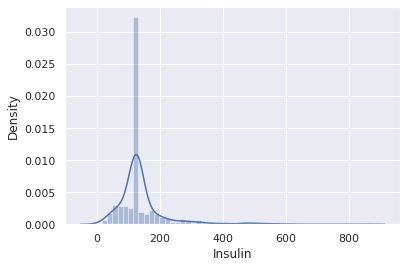

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


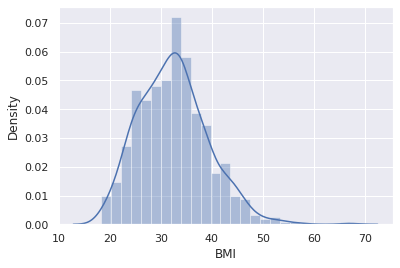

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


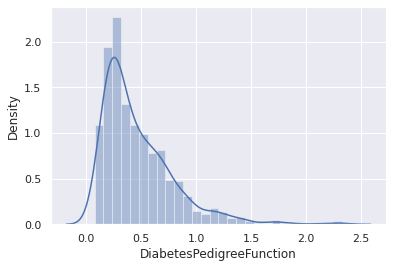

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


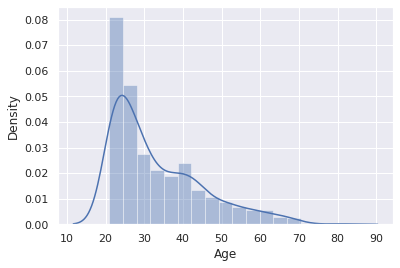

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


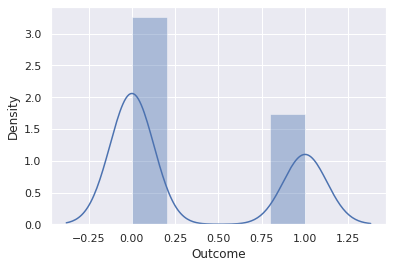

In [26]:
data_feature = data.columns

for feature in data_feature:
    p = sns.distplot(a = data[feature])
    plt.show()

* Pair Plot to see Distribution of all data at a time and dependencies

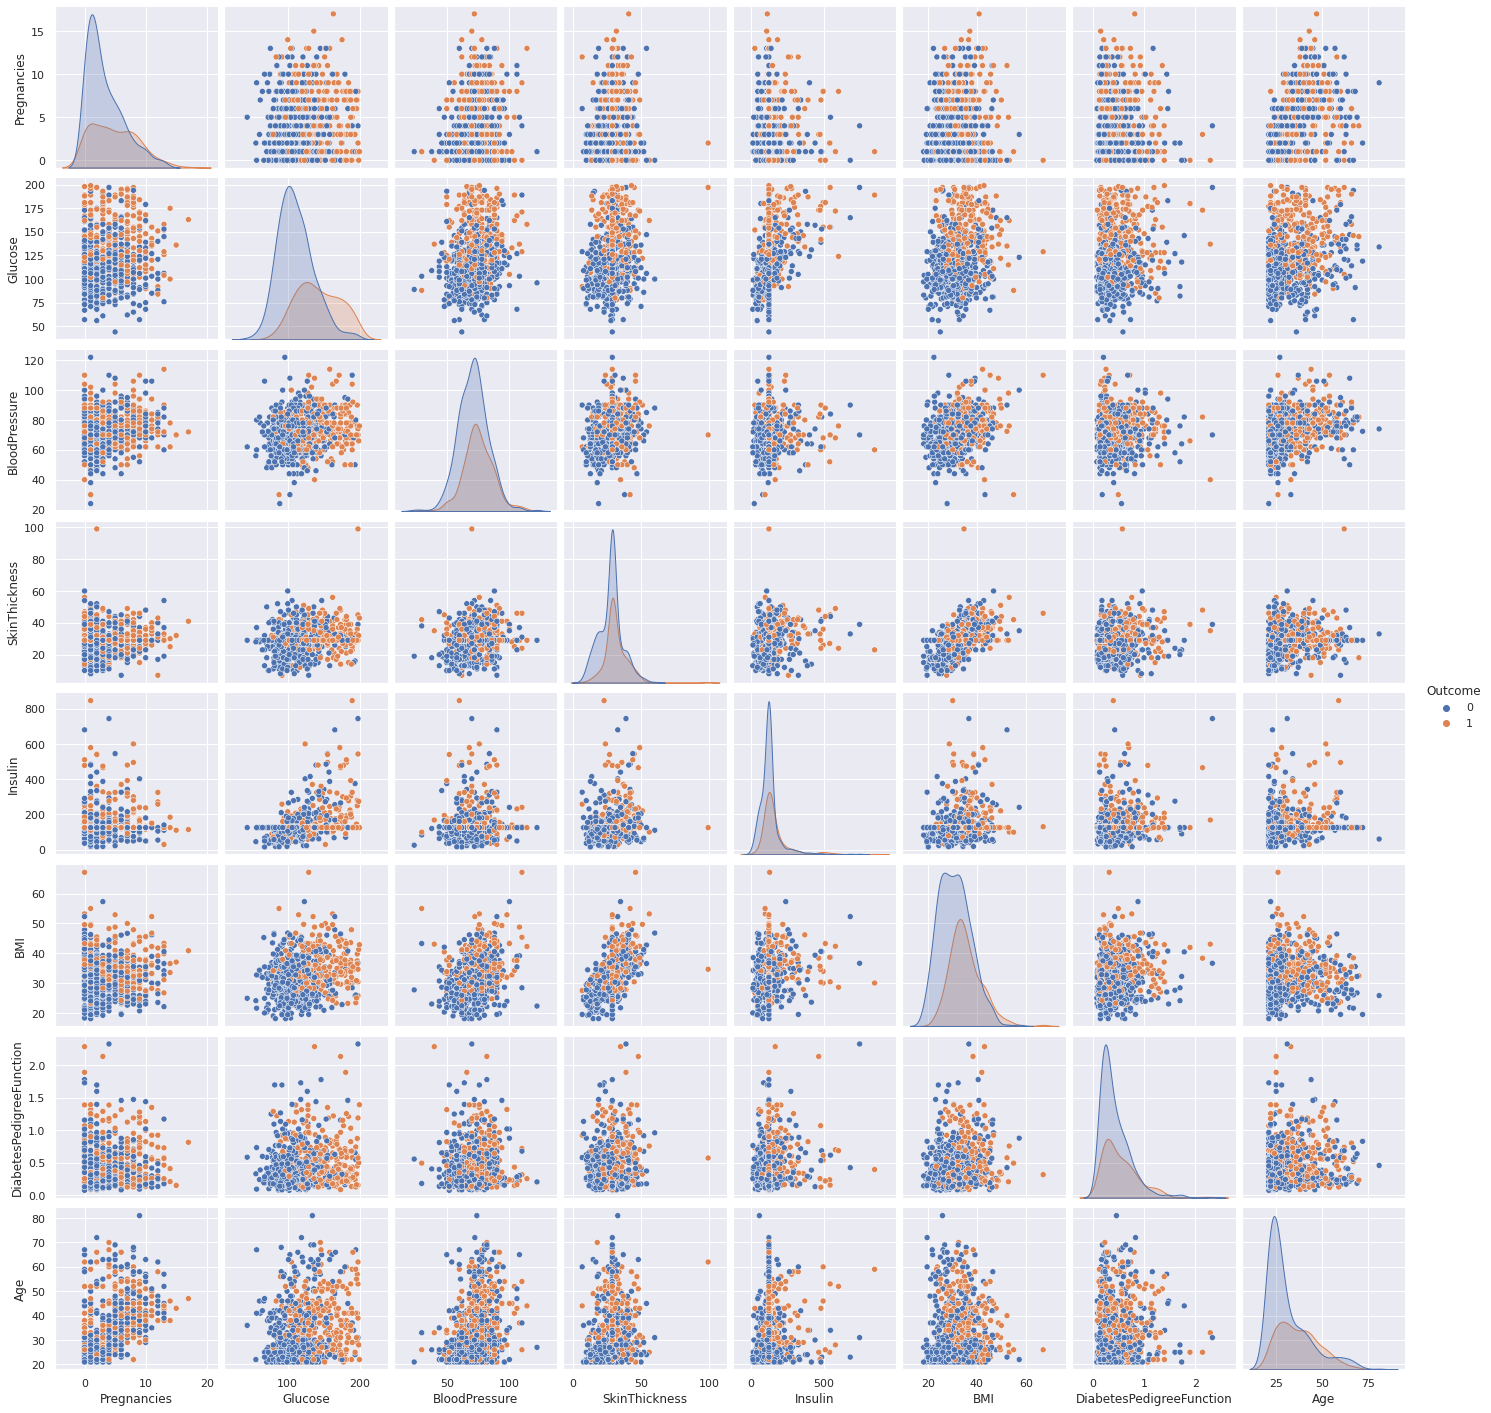

In [27]:
sns.pairplot(data =data, hue = 'Outcome')
plt.show()

# observations:

* SkinThickness and BMI column have a postive correlation with the target 

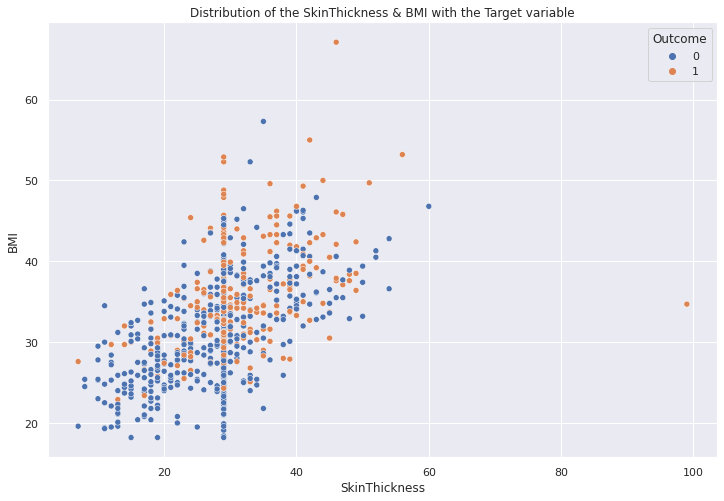

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x ="SkinThickness", y= "BMI", hue = 'Outcome',data= data)
plt.title("Distribution of the SkinThickness & BMI with the Target variable")
plt.show()

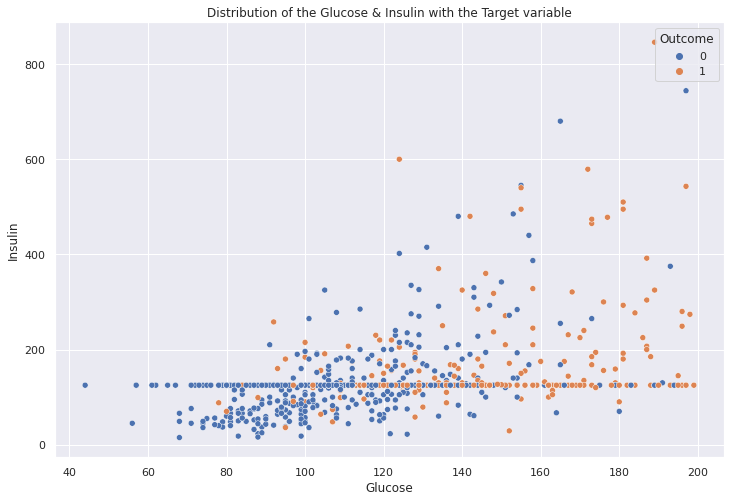

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(x ="Glucose", y= "Insulin", hue = 'Outcome',data= data)
plt.title("Distribution of the Glucose & Insulin with the Target variable")
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='count'>

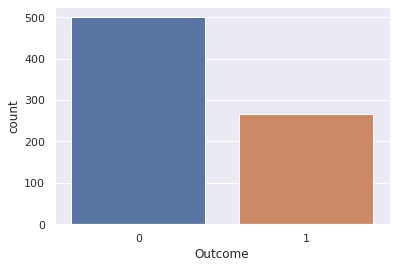

In [30]:
sns.countplot(x = 'Outcome', data= data)

* We have imbalaned data in our Outcome column
* we will take care of that

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    float64
 2   BloodPressure             767 non-null    float64
 3   SkinThickness             767 non-null    float64
 4   Insulin                   767 non-null    float64
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


# AGE & Outcome

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


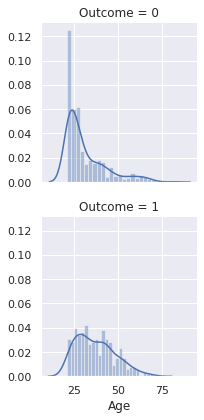

In [32]:
g = sns.FacetGrid(data, row="Outcome")
g.map(sns.distplot, "Age", bins=25)
plt.show()

# Insulin & Outcome

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


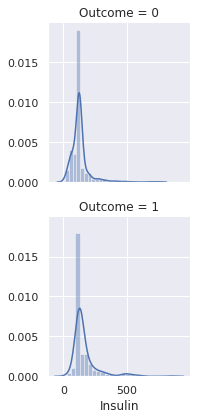

In [33]:
g = sns.FacetGrid(data, row="Outcome")
g.map(sns.distplot, "Insulin", bins=25)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


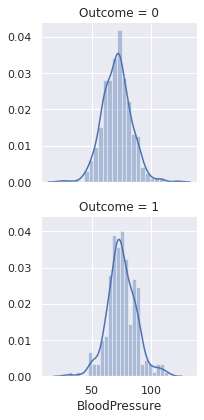

In [34]:
g = sns.FacetGrid(data, row="Outcome")
g.map(sns.distplot, "BloodPressure", bins=25)
plt.show()

# Correlation 

<AxesSubplot:>

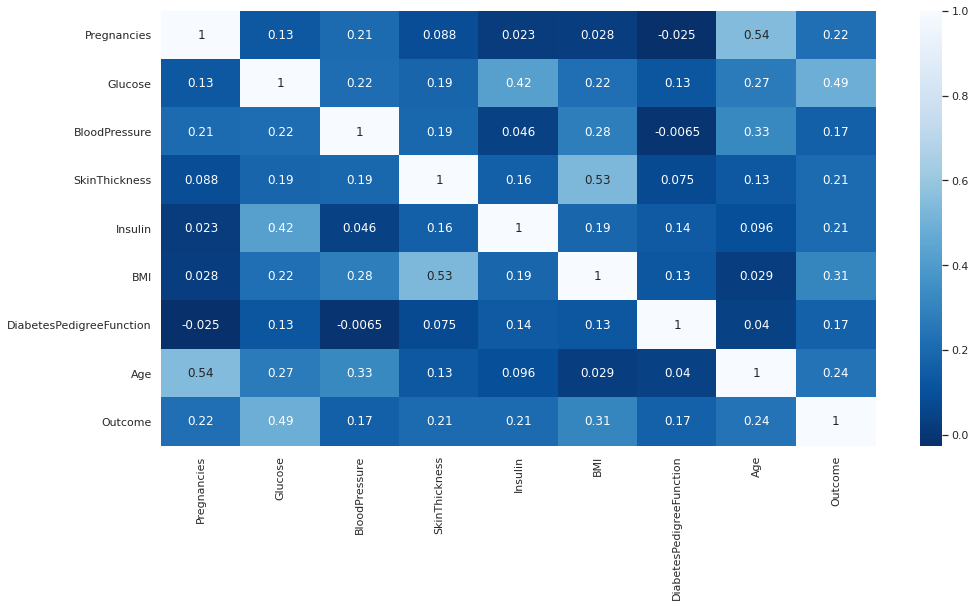

In [35]:
corr_matrix = data.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, cmap='Blues_r', annot=True)

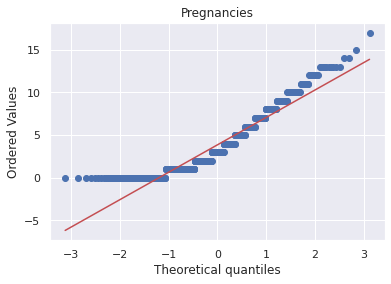

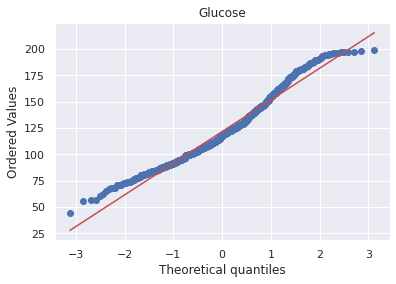

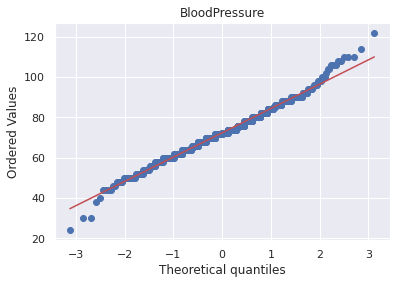

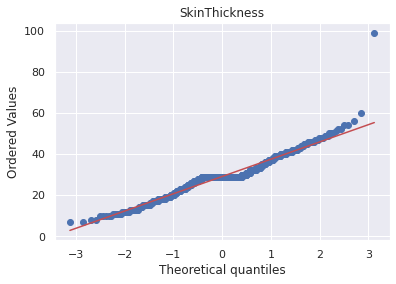

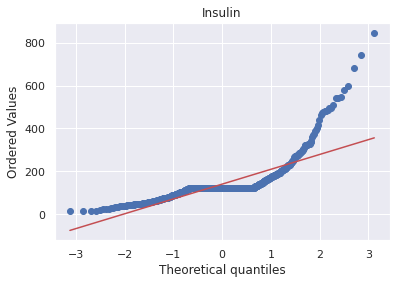

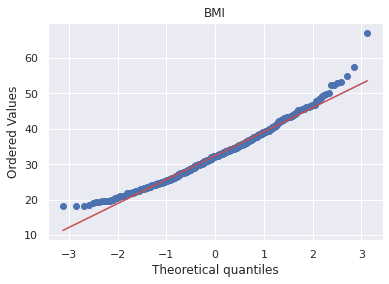

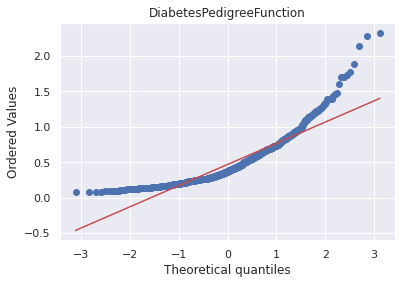

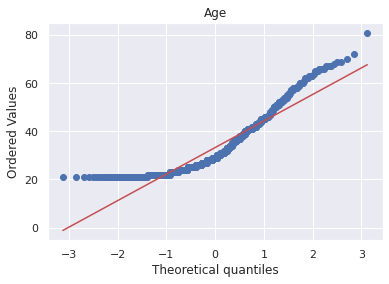

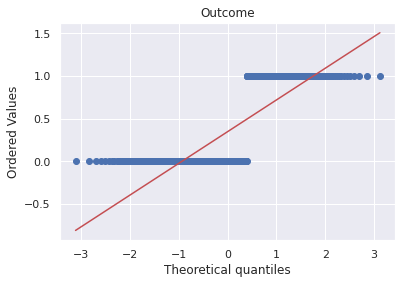

In [36]:
from scipy import stats
for feature in data.columns:
    stats.probplot(data[feature], plot = plt)
    plt.title(feature)
    plt.show()

#  Data Engineering
* New Feature
* Edit Feature
* Drop Feature
* Standardizing Data

# Creating New features 
* We saw thatSkinThickness and BMI column have a postive correlation with the target

In [37]:
data["new"] = data["SkinThickness"] + data["BMI"]

In [38]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,new
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,68.6
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,55.6
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,52.3
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,51.1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,78.1


Great, we crated a new column which is the integration of the SkinThickness and BMI

## Standardizing Data

In [39]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'new'],
      dtype='object')

In [40]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age','new']] = scale.fit_transform(data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age','new']])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,new
0,0.638586,0.869128,-0.032898,0.681880,-0.183593,0.173368,0.486969,1.424610,1,0.522637
1,-0.846542,-1.205771,-0.528985,-0.007338,-0.183593,-0.855152,-0.365500,-0.191523,0,-0.432147
2,1.232637,2.021849,-0.694347,-0.007338,-0.183593,-1.340026,0.625958,-0.106463,1,-0.674515
3,-0.846542,-1.074031,-0.528985,-0.696557,-0.542964,-0.634755,-0.933813,-1.042119,0,-0.762649
4,-1.143568,0.506844,-2.678694,0.681880,0.314890,1.569216,5.617225,-0.021404,1,1.220363


# Drop the Features

In [41]:
data.drop('SkinThickness', axis = 1, inplace = True)
data.drop('BMI', axis = 1, inplace =True)
data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,DiabetesPedigreeFunction,Age,Outcome,new
0,0.638586,0.869128,-0.032898,-0.183593,0.486969,1.424610,1,0.522637
1,-0.846542,-1.205771,-0.528985,-0.183593,-0.365500,-0.191523,0,-0.432147
2,1.232637,2.021849,-0.694347,-0.183593,0.625958,-0.106463,1,-0.674515
3,-0.846542,-1.074031,-0.528985,-0.542964,-0.933813,-1.042119,0,-0.762649
4,-1.143568,0.506844,-2.678694,0.314890,5.617225,-0.021404,1,1.220363


In [42]:
X=data.drop('Outcome', axis = 1)
y = data['Outcome']

In [43]:
X.head()

,Pregnancies,Glucose,BloodPressure,Insulin,DiabetesPedigreeFunction,Age,new
0,0.638586,0.869128,-0.032898,-0.183593,0.486969,1.424610,0.522637
1,-0.846542,-1.205771,-0.528985,-0.183593,-0.365500,-0.191523,-0.432147
2,1.232637,2.021849,-0.694347,-0.183593,0.625958,-0.106463,-0.674515
3,-0.846542,-1.074031,-0.528985,-0.542964,-0.933813,-1.042119,-0.762649
4,-1.143568,0.506844,-2.678694,0.314890,5.617225,-0.021404,1.220363


In [44]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Splitting data into train and test set

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 0)

## Fitting data in various models

In [46]:
def svm_classifier(X_train, X_test, y_train, y_test):
    
    classifier_svm = SVC(kernel = 'rbf', random_state = 0)
    classifier_svm.fit(X_train, y_train)

    y_pred = classifier_svm.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_svm.score(X_train, y_train)}\nTest score : {classifier_svm.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [47]:
def knn_classifier(X_train, X_test, y_train, y_test):
    
    classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
    classifier_knn.fit(X_train, y_train)

    y_pred = classifier_knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [48]:

def naive_classifier(X_train, X_test, y_train, y_test):
    
    classifier_naive = GaussianNB()
    classifier_naive.fit(X_train, y_train)

    y_pred = classifier_naive.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_naive.score(X_train, y_train)}\nTest score : {classifier_naive.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [49]:

def tree_classifier(X_train, X_test, y_train, y_test):
    
    classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier_tree.fit(X_train, y_train)

    y_pred = classifier_tree.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_tree.score(X_train, y_train)}\nTest score : {classifier_tree.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [50]:

def forest_classifier(X_train, X_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    classifier_forest.fit(X_train, y_train)

    y_pred = classifier_forest.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [51]:
def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    svm_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("KNN:\n")
    knn_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Naive:\n")
    naive_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Decision Tree:\n")
    tree_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Random Forest:\n")
    forest_classifier(X_train, X_test, y_train, y_test)


In [52]:
print_score(X_train, X_test, y_train, y_test)

SVM:

Train score : 0.800978792822186
Test score : 0.8181818181818182
----------------------------------------------------------------------------------------------------

KNN:

Train score : 0.7960848287112561
Test score : 0.8441558441558441
----------------------------------------------------------------------------------------------------

Naive:

Train score : 0.734094616639478
Test score : 0.8376623376623377
----------------------------------------------------------------------------------------------------

Decision Tree:

Train score : 1.0
Test score : 0.7922077922077922
----------------------------------------------------------------------------------------------------

Random Forest:

Train score : 1.0
Test score : 0.8506493506493507


* * oops, we have encountered with overfittingbut, the best model is SVC.

# Performance Metrics

In [53]:
classifier_svm = SVC(kernel = 'rbf', random_state = 0, probability=True)
classifier_svm.fit(X_train, y_train)

y_pred = classifier_svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[97, 12],
       [16, 29]])

In [54]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,97,12,109
1,16,29,45
All,113,41,154


**Checking data is balanced or not**

In [55]:
data['Outcome'].value_counts()

0    500
1    267
Name: Outcome, dtype: int64

### we have an imbalanced data in Outcome column, therefore, we should look at the F1-score instead of Accuracy metrics

### Classification Report (Accuracy, Precision, Recall, F1-score)

In [56]:
from sklearn.metrics import roc_curve,roc_auc_score, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       109
           1       0.71      0.64      0.67        45

    accuracy                           0.82       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.81      0.82      0.82       154



**Getting probability instead of A/B test**

In [57]:
y_pred_prob = classifier_svm.predict_proba(X_test)[:,1]
y_pred_prob

array([0.88128853, 0.14141511, 0.14454427, 0.66859476, 0.17660775,
       0.17715324, 0.91122939, 0.17163185, 0.52566236, 0.26991187,
       0.73423526, 0.20893349, 0.24666302, 0.78073912, 0.10076533,
       0.18515888, 0.94051325, 0.16210164, 0.54069287, 0.19294294,
       0.74436778, 0.58216099, 0.13827694, 0.14327247, 0.11495283,
       0.69756664, 0.15571238, 0.43563388, 0.1233901 , 0.13784563,
       0.51026525, 0.20819274, 0.24871904, 0.62120127, 0.17061265,
       0.77284628, 0.13674344, 0.12656349, 0.27009802, 0.76234337,
       0.19909251, 0.13729409, 0.15529731, 0.87853816, 0.63345935,
       0.13803052, 0.16109578, 0.23023523, 0.47113515, 0.40203839,
       0.51644298, 0.14674471, 0.86192278, 0.35097299, 0.22520986,
       0.12114019, 0.14324175, 0.30991224, 0.16148324, 0.21437306,
       0.89007868, 0.33096635, 0.22690853, 0.58263953, 0.86513105,
       0.8509575 , 0.74661434, 0.19158069, 0.33967495, 0.14547163,
       0.10847958, 0.25191393, 0.15908631, 0.14598937, 0.87671

**Evaluating FPR, TPR, Threshold**

In [58]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
print("FPR:\n\n", fpr)


print("-"*100)

print("TPR:\n\n", tpr)

FPR:

 [0.         0.         0.         0.01834862 0.01834862 0.02752294
 0.02752294 0.03669725 0.03669725 0.05504587 0.05504587 0.06422018
 0.06422018 0.08256881 0.08256881 0.09174312 0.09174312 0.10091743
 0.10091743 0.11009174 0.11009174 0.12844037 0.12844037 0.14678899
 0.14678899 0.1559633  0.1559633  0.16513761 0.16513761 0.18348624
 0.18348624 0.22018349 0.22018349 0.24770642 0.24770642 0.26605505
 0.26605505 1.        ]
----------------------------------------------------------------------------------------------------
TPR:

 [0.         0.02222222 0.28888889 0.28888889 0.31111111 0.31111111
 0.4        0.4        0.48888889 0.48888889 0.51111111 0.51111111
 0.57777778 0.57777778 0.6        0.6        0.62222222 0.62222222
 0.64444444 0.64444444 0.66666667 0.66666667 0.71111111 0.71111111
 0.75555556 0.75555556 0.77777778 0.77777778 0.8        0.8
 0.91111111 0.91111111 0.93333333 0.93333333 0.97777778 0.97777778
 1.         1.        ]


**Plotting ROC Curve**

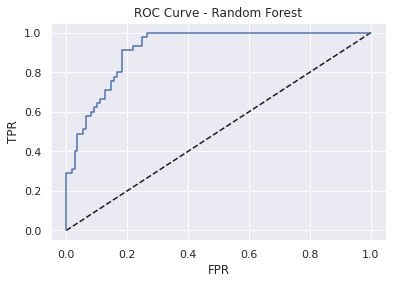

In [59]:
plt.plot([0, 1], [0, 1], "k--", label = '50% AUC')
plt.plot(fpr, tpr, label = "Random Forest")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Random Forest")
plt.show()

**ROC Score**

In [60]:
roc_auc_score(y_test,y_pred_prob)

0.9182466870540266

## Hyperparameter Tunning

In [61]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_svm, X = X_train, y = y_train, cv = 10)
print(accuracies.mean(), accuracies.std())

0.7391062929666842 0.022698686583128253


In [62]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[100,   9],
       [ 12,  33]])

In [63]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [25, 50, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [14, 20, 25, 30]
}

In [64]:

grid_search = GridSearchCV(estimator = classifier_forest,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print('best_accuracy = ',grid_search.best_score_)
print('best_parameters = ', grid_search.best_params_)

best_accuracy =  0.7325753569539926
best_parameters =  {'criterion': 'gini', 'max_depth': 14, 'n_estimators': 300}


In [65]:
classifier_forest = RandomForestClassifier(criterion = 'gini', max_depth = 25, n_estimators = 200, random_state = 0)
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[97, 12],
       [10, 35]])

In [66]:

#param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
# 'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
#'kernel': ['rbf', 'poly', 'linear']} 

In [67]:
#grid_search = GridSearchCV(estimator= classifier_svm, 
#param_grid = param_grid,
#scoring='accuracy',
#cv =10)
#grid_search.fit(X_train,y_train)
#print('best accuracy= ',grid_search.best_score_)
#print('best parameters = ',grid_search.best_params_)

## Saving model using pickle

In [68]:
filename = 'diabetes_model.pkl'
pickle.dump(classifier_svm, open(filename, 'wb'))


In [69]:
model = open('diabetes_model.pkl','rb')
svc = pickle.load(model)

In [70]:
y_pred = svc.predict(X_test)

In [71]:
confusion_matrix(y_test, y_pred)

array([[97, 12],
       [16, 29]])